In [1]:
import zipfile
import os
from google.colab import drive
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D, Flatten, Dense
import pandas as pd

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!cp /content/gdrive/'My Drive'/10_food_classes_all_data.zip .

In [4]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
main_dir="10_food_classes_all_data/10_food_classes_all_data"

In [5]:
food_list = os.listdir("10_food_classes_all_data/10_food_classes_all_data/train")
food_list.sort()
print(food_list)

['hamburger', 'ice_cream', 'pizza']


In [6]:
tf.random.set_seed(42)

train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [7]:
# Create our model multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [8]:
# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
71/71 [==============================] - 22s 140ms/step - loss: 1.0178 - accuracy: 0.4880 - val_loss: 0.9470 - val_accuracy: 0.5733
Epoch 2/5
71/71 [==============================] - 10s 141ms/step - loss: 0.8699 - accuracy: 0.6111 - val_loss: 0.8727 - val_accuracy: 0.6147
Epoch 3/5
71/71 [==============================] - 8s 113ms/step - loss: 0.7584 - accuracy: 0.6809 - val_loss: 0.8685 - val_accuracy: 0.6187
Epoch 4/5
71/71 [==============================] - 9s 133ms/step - loss: 0.6218 - accuracy: 0.7498 - val_loss: 0.8694 - val_accuracy: 0.6360
Epoch 5/5
71/71 [==============================] - 10s 140ms/step - loss: 0.4042 - accuracy: 0.8489 - val_loss: 0.9880 - val_accuracy: 0.6227


<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

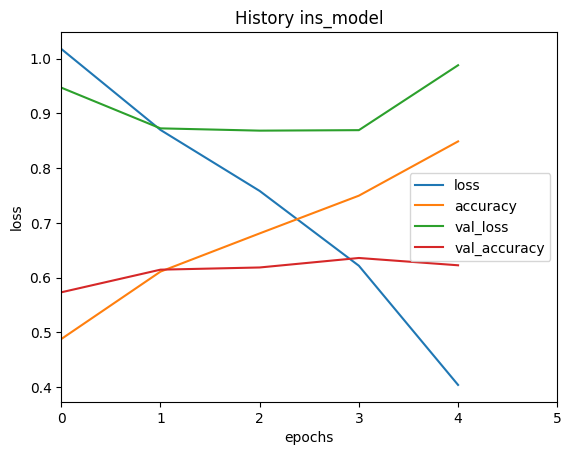

In [9]:
pd.DataFrame(history_9.history).plot(xlabel="epochs", ylabel="loss",title="History ins_model", xlim=(0,5))

In [10]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
71/71 [==============================] - 9s 108ms/step - loss: 2.2423 - accuracy: 0.4653 - val_loss: 0.9217 - val_accuracy: 0.5907
Epoch 2/5
71/71 [==============================] - 10s 146ms/step - loss: 0.8050 - accuracy: 0.6462 - val_loss: 0.8556 - val_accuracy: 0.6347
Epoch 3/5
71/71 [==============================] - 11s 158ms/step - loss: 0.5652 - accuracy: 0.7942 - val_loss: 0.8554 - val_accuracy: 0.6573
Epoch 4/5
71/71 [==============================] - 8s 109ms/step - loss: 0.3215 - accuracy: 0.9071 - val_loss: 0.8948 - val_accuracy: 0.6227
Epoch 5/5
71/71 [==============================] - 10s 137ms/step - loss: 0.1775 - accuracy: 0.9591 - val_loss: 0.8698 - val_accuracy: 0.6600


<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

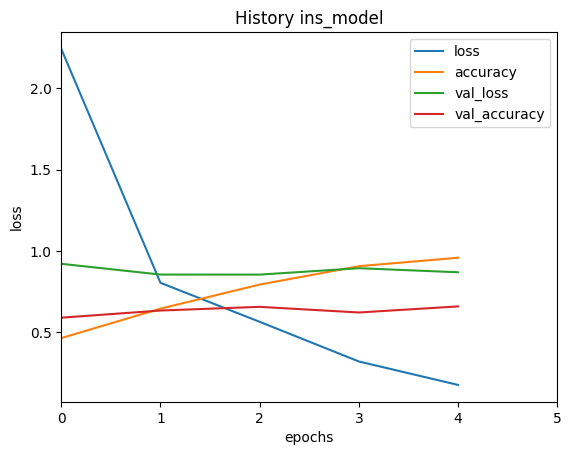

In [11]:
pd.DataFrame(history_1.history).plot(xlabel="epochs", ylabel="loss",title="History ins_model", xlim=(0,5))

In [12]:
model_2 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
71/71 [==============================] - 14s 160ms/step - loss: 1.5129 - accuracy: 0.5120 - val_loss: 0.9034 - val_accuracy: 0.6120
Epoch 2/5
71/71 [==============================] - 9s 122ms/step - loss: 0.8420 - accuracy: 0.6267 - val_loss: 0.8195 - val_accuracy: 0.6307
Epoch 3/5
71/71 [==============================] - 11s 149ms/step - loss: 0.6761 - accuracy: 0.7200 - val_loss: 0.8497 - val_accuracy: 0.6253
Epoch 4/5
71/71 [==============================] - 10s 143ms/step - loss: 0.4250 - accuracy: 0.8427 - val_loss: 0.9682 - val_accuracy: 0.6293
Epoch 5/5
71/71 [==============================] - 9s 130ms/step - loss: 0.2028 - accuracy: 0.9333 - val_loss: 1.0071 - val_accuracy: 0.6613


<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

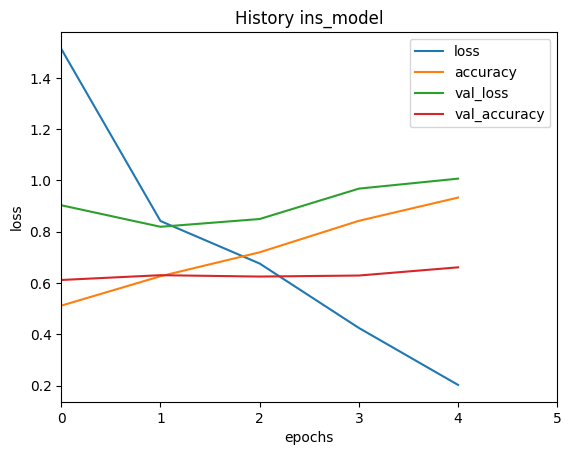

In [13]:
pd.DataFrame(history_2.history).plot(xlabel="epochs", ylabel="loss",title="History ins_model", xlim=(0,5))

In [14]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
71/71 [==============================] - 13s 152ms/step - loss: 1.2022 - accuracy: 0.4840 - val_loss: 0.9576 - val_accuracy: 0.5480
Epoch 2/5
71/71 [==============================] - 10s 139ms/step - loss: 0.9093 - accuracy: 0.5889 - val_loss: 0.8532 - val_accuracy: 0.6027
Epoch 3/5
71/71 [==============================] - 8s 113ms/step - loss: 0.7731 - accuracy: 0.6662 - val_loss: 0.7985 - val_accuracy: 0.6533
Epoch 4/5
71/71 [==============================] - 10s 142ms/step - loss: 0.6323 - accuracy: 0.7409 - val_loss: 0.8152 - val_accuracy: 0.6427
Epoch 5/5
71/71 [==============================] - 8s 112ms/step - loss: 0.4767 - accuracy: 0.8120 - val_loss: 1.0127 - val_accuracy: 0.5680


<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

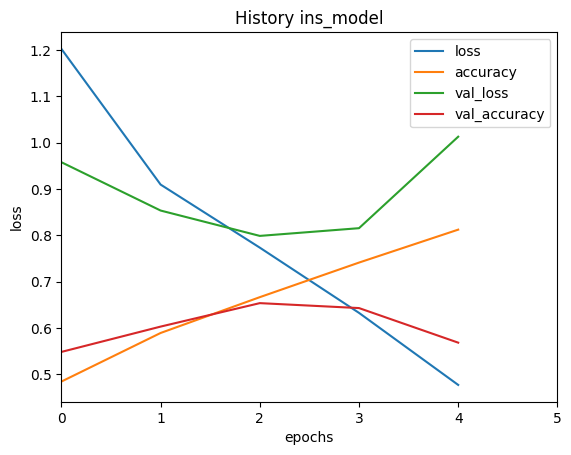

In [15]:
pd.DataFrame(history_3.history).plot(xlabel="epochs", ylabel="loss",title="History ins_model", xlim=(0,5))

In [16]:
import tensorflow_hub as hub

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

efficientnet_model = Sequential([
    hub.KerasLayer(efficientnet_url, trainable=False),
    Dense(3, activation='softmax')
])

efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

history_efficientnet = efficientnet_model.fit(train_data, epochs=10, validation_data=test_data)

loss_efficientnet, accuracy_efficientnet = efficientnet_model.evaluate(test_data)

print("EfficientNet Model - Accuracy:", accuracy_efficientnet)


Epoch 1/10
71/71 [==============================] - 23s 182ms/step - loss: 0.3168 - accuracy: 0.9084 - val_loss: 0.0899 - val_accuracy: 0.9840
Epoch 2/10
71/71 [==============================] - 10s 145ms/step - loss: 0.1012 - accuracy: 0.9756 - val_loss: 0.0638 - val_accuracy: 0.9827
Epoch 3/10
71/71 [==============================] - 9s 120ms/step - loss: 0.0747 - accuracy: 0.9840 - val_loss: 0.0546 - val_accuracy: 0.9840
Epoch 4/10
71/71 [==============================] - 9s 132ms/step - loss: 0.0602 - accuracy: 0.9884 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 5/10
71/71 [==============================] - 10s 145ms/step - loss: 0.0500 - accuracy: 0.9907 - val_loss: 0.0489 - val_accuracy: 0.9853
Epoch 6/10
71/71 [==============================] - 9s 121ms/step - loss: 0.0427 - accuracy: 0.9920 - val_loss: 0.0479 - val_accuracy: 0.9853
Epoch 7/10
71/71 [==============================] - 10s 142ms/step - loss: 0.0370 - accuracy: 0.9938 - val_loss: 0.0476 - val_accuracy: 0.9853
Ep

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

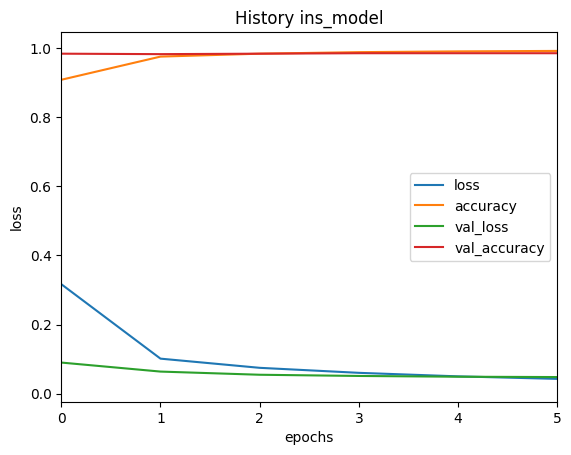

In [17]:
pd.DataFrame(history_efficientnet.history).plot(xlabel="epochs", ylabel="loss",title="History ins_model", xlim=(0,5))